In [1]:
import os
import chardet
import numpy as np
import pandas as pd
import joblib

In [2]:
os.getcwd()

'C:\\Users\\15U40N\\Documents\\NH-main\\live'

In [3]:
os.chdir('../data')

In [4]:
[file for file in os.listdir() if '.z' in file]

['APT_List_Seoul_2021.z']

In [5]:
apt = joblib.load('APT_List_Seoul_2021.z')

In [6]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41264 entries, 0 to 41263
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   아파트     41264 non-null  object        
 1   시도      41264 non-null  object        
 2   자치구     41264 non-null  object        
 3   읍면동     41264 non-null  object        
 4   지번      41264 non-null  object        
 5   거래일     41264 non-null  datetime64[ns]
 6   전용면적    41264 non-null  float64       
 7   층       41264 non-null  int32         
 8   거래금액    41264 non-null  float64       
 9   평당금액    41264 non-null  float64       
 10  금액구분    41264 non-null  object        
 11  주소      41264 non-null  object        
 12  아파트ID   41264 non-null  int64         
 13  아파트명    41264 non-null  object        
 14  위도      41264 non-null  float64       
 15  경도      41264 non-null  float64       
 16  세대수     41264 non-null  int64         
 17  임대수     41264 non-null  int64         
 18  동수    

In [7]:
apt.head()

,아파트,시도,자치구,읍면동,지번,거래일,전용면적,층,거래금액,평당금액,...,아파트명,위도,경도,세대수,임대수,동수,주차대수,용적률,건폐율,건설사
0,동아그린,서울특별시,용산구,이촌동,411,2021-01-01,43.02,11,8.75,6711.994421,...,그린,37.524037,126.95801,499,0,6,539,384,23,동아건설(주)
1,동아그린,서울특별시,용산구,이촌동,411,2021-01-05,59.58,15,11.80,6535.750252,...,그린,37.524037,126.95801,499,0,6,539,384,23,동아건설(주)
2,동아그린,서울특별시,용산구,이촌동,411,2021-01-19,84.82,18,13.00,5057.769394,...,그린,37.524037,126.95801,499,0,6,539,384,23,동아건설(주)
3,동아그린,서울특별시,용산구,이촌동,411,2021-01-19,114.96,19,14.95,4291.492693,...,그린,37.524037,126.95801,499,0,6,539,384,23,동아건설(주)
4,동아그린,서울특별시,용산구,이촌동,411,2021-01-23,43.02,3,8.15,6251.743375,...,그린,37.524037,126.95801,499,0,6,539,384,23,동아건설(주)


In [8]:
apt.columns

Index(['아파트', '시도', '자치구', '읍면동', '지번', '거래일', '전용면적', '층', '거래금액', '평당금액',
       '금액구분', '주소', '아파트ID', '아파트명', '위도', '경도', '세대수', '임대수', '동수', '주차대수',
       '용적률', '건폐율', '건설사'],
      dtype='object')

In [9]:
apt = apt.drop(columns = ['주소', '아파트ID', '아파트명'])

In [10]:
apt['거래월'] = apt['거래일'].dt.strftime('%m월')

In [11]:
apt = apt.sort_values(by = ['거래월'])

In [12]:
apt.head()

,아파트,시도,자치구,읍면동,지번,거래일,전용면적,층,거래금액,평당금액,...,위도,경도,세대수,임대수,동수,주차대수,용적률,건폐율,건설사,거래월
0,동아그린,서울특별시,용산구,이촌동,411,2021-01-01,43.02,11,8.75,6711.994421,...,37.524037,126.958010,499,0,6,539,384,23,동아건설(주),01월
22813,마곡수명산파크1단지,서울특별시,강서구,내발산동,742,2021-01-15,84.53,2,9.18,3583.816397,...,37.554424,126.830513,1421,841,16,1581,225,19,(주)케이씨씨건설,01월
22814,마곡수명산파크1단지,서울특별시,강서구,내발산동,742,2021-01-16,84.53,2,6.50,2537.560629,...,37.554424,126.830513,1421,841,16,1581,225,19,(주)케이씨씨건설,01월
22815,마곡수명산파크1단지,서울특별시,강서구,내발산동,742,2021-01-25,84.82,7,9.69,3769.983494,...,37.554424,126.830513,1421,841,16,1581,225,19,(주)케이씨씨건설,01월
22816,마곡수명산파크1단지,서울특별시,강서구,내발산동,742,2021-01-30,84.53,8,9.80,3825.860641,...,37.554424,126.830513,1421,841,16,1581,225,19,(주)케이씨씨건설,01월


In [13]:
apt['거래일'].dt.strftime('%Y년 %m월')

0        2021년 01월
22813    2021년 01월
22814    2021년 01월
22815    2021년 01월
22816    2021년 01월
           ...    
29153    2021년 12월
29149    2021년 12월
29141    2021년 12월
17800    2021년 12월
41263    2021년 12월
Name: 거래일, Length: 41264, dtype: object

In [14]:
apt['거래일'].dt.strftime('%Y-%m')

0        2021-01
22813    2021-01
22814    2021-01
22815    2021-01
22816    2021-01
          ...   
29153    2021-12
29149    2021-12
29141    2021-12
17800    2021-12
41263    2021-12
Name: 거래일, Length: 41264, dtype: object

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

<AxesSubplot: xlabel='거래금액', ylabel='Count'>

C:\Users\15U40N\Venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\15U40N\Venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\15U40N\Venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
C:\Users\15U40N\Venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
C:\Users\15U40N\Venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\15U40N\Venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from c

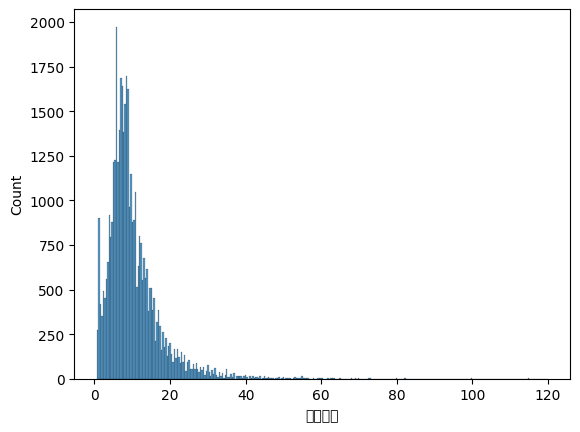

In [16]:
sns.histplot(data = apt, x = '거래금액')
plt.title(label = '아파트 거래금액 분포');